In [ ]:
#Here, we will do some text analysis to look at common words in CNN headlines
import numpy as np
import pandas as pd
import urllib
import bs4
#if wordcloud doesn't work, use ---->!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
links=[]

page="https://www.cnn.com/profiles"
f=urllib.urlopen(page)
myfile=f.read()
soup=bs4.BeautifulSoup(myfile)
#print soup
articles_parent=soup.find_all('h3', {"class":'cd__headline'})
for i in articles_parent:
    for j in soup.find_all('a', href=True):
        if "profiles" in j['href']:
            link="https://www.cnn.com"+j["href"]
            if link not in links:
                links.append(link)
                

In [ ]:
#Note, if you are running this on a local machine, it will take a very long time. It takes a few minutes to run on my
#Google clould VM instance.  The program is essentially going to each link in the list above, then finding the headlines 
#from that contributor, and appending the text of the headline to a new list, called quotes.

quotes=[]

for i in links:
  polarity_scores=[]
  f=urllib.urlopen(i)
  myfile=f.read()
  soup=bs4.BeautifulSoup(myfile)
  articles_parent=soup.find_all('span', {"class":'cd__headline-text'})
  for j in articles_parent:
    quote=j.get_text()
    quotes.append(quote)


In [6]:
quotes=quotes[387:len(quotes)]
quotes[1:10]

[u'Dissecting the US relationship with N. Korea',
 u'Trump to visit Carolinas on Wednesday',
 u'White House plan to defend Kavanaugh relies heavily on women',
 u'Gary Cohn and Rob Porter push back on Woodward book',
 u'White House aides narrow search for anonymous op-ed writer to a few people, source says',
 u'Here are the administration officials who deny they wrote The New York Times op-ed',
 u'Trump on NYT op-ed: You could call it treason',
 u'Advisers worried what Dem-controlled House means for Trump',
 u'Don McGahn to leave job as White House counsel, Trump says']

In [52]:
len(quotes)

8210

In [53]:
#Use list comprehension and split each headline on a space to end up with a list of words.
words=[w for line in quotes for w in line.split()]
len(words)

70067

In [89]:
#Only keep words of a certain length...it is up to you what length.
words_new=[word for word in words if len(word) >=6]

In [90]:
len(words_new)

30129

In [91]:
#Create a dictionary with the word and associated frequencies of each word.
counters={}
for i in words_new:
  if i in counters:
    counters[i]+=1
  else:
    counters[i]=1



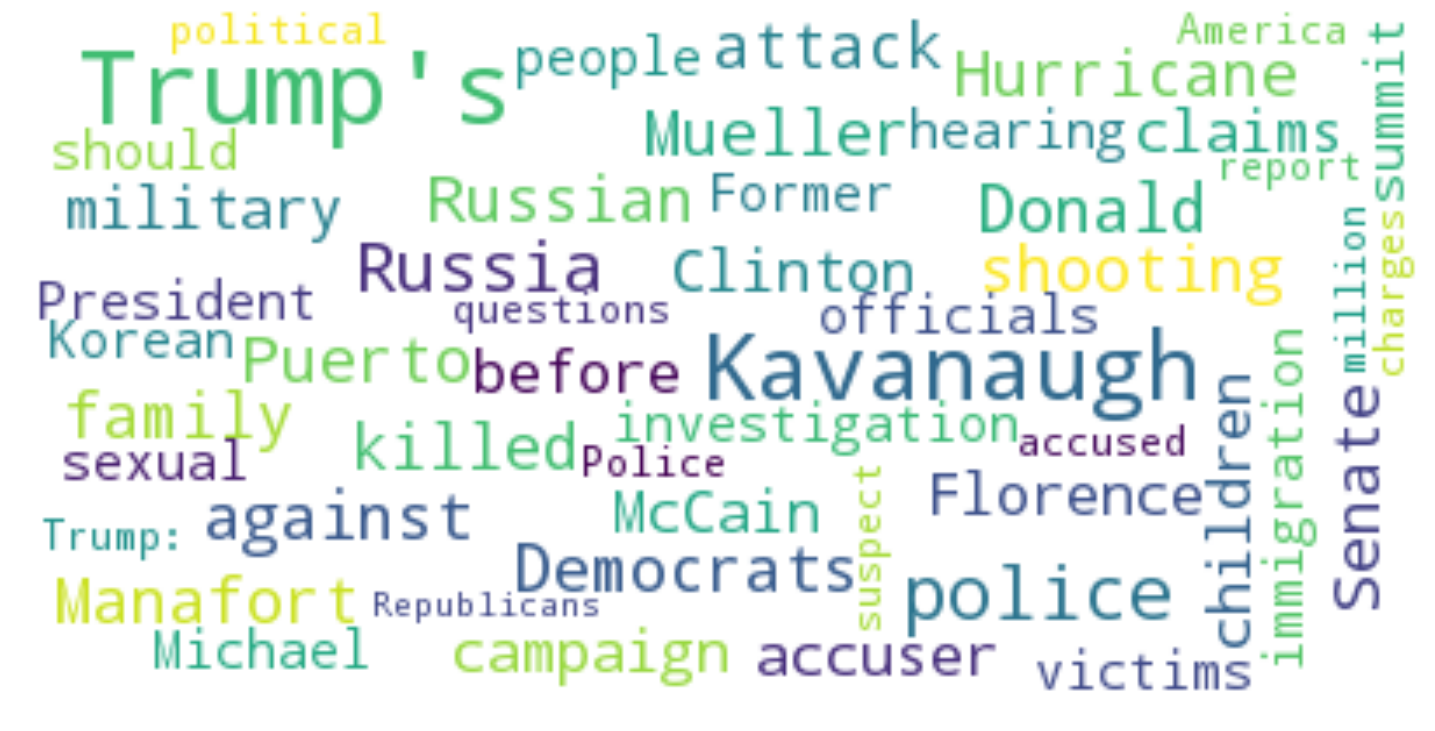

In [92]:
#Generate the word cloud from the dictionary created above.

wordcloud = WordCloud(max_words=50, background_color="white", max_font_size=30).generate_from_frequencies(counters)

# Display the generated image:
plt.figure(figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [105]:
#You can see in the above word cloud that 'Puerto' is showing up as a single word but it should be Puerto Rico. 
#We could just use a replace function that iterated over each row in our initial list, and then if the words 
#'Puerto Rico' were there, join them into a single word.  That might look like the following:

replacement1='Puerto-Rico'
replacement2='NorthKorea'

#words_replaced=[w.replace(string_to_replace, replacement) for w in quotes]
quotes_new=[]

for i in quotes:
  if 'Puerto Rico' not in i and 'North Korea' not in i:
    quotes_new.append(i)
  else:
    if 'Puerto Rico' in i:
       quotes_new.append(i.replace('Puerto Rico', replacement))
    else:
      if 'North Korea' in i:
        quote_new.append(i.replace('North Korea', replacement2))

In [106]:
words_quotes_new=[w for line in quotes_new for w in line.split()]
len(words_quotes_new)

70008

In [107]:
words_quotes_new=[word for word in words_quotes_new if len(word)>=6]
len(words_quotes_new)

30124

In [108]:
#Create a dictionary with the word and associated frequencies of each word.
counter2={}
for i in words_quotes_new:
  if i in counter2:
    counter2[i]+=1
  else:
    counter2[i]=1



In [ ]:
#Generate the word cloud from the dictionary created above.

wordcloud = WordCloud(max_words=50, background_color="white", max_font_size=30).generate_from_frequencies(counter2)

# Display the generated image:
plt.figure(figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()